In [2]:
import sys 
sys.path.append('../../src')

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography


In [3]:
import json

with open('colors.json', 'r') as f:
    color_dict = json.load(f)

In [4]:
# adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_kidney_13.h5ad')
adata = sc.read_h5ad('/Volumes/SSD/training_data/mouse_kidney_13.h5ad')
adata

AnnData object with n_obs × n_vars = 8509 × 3058
    obs: 'ct1', 'ct2', 'ct3', 'ct4', 'cond', 'medulla_cortex', 'domain', 'cell_type', 'cell_type_int'
    uns: 'cell_thresholds', 'cell_type_colors', 'neighbors', 'pca', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs.cell_type.value_counts()

cell_type
Myeloid                5266
Endothelial            1779
Epithelial              462
B                       442
T                       361
Mesenchymal_Stromal     128
NK                       71
Name: count, dtype: int64

In [7]:
import glob

In [6]:
from spaceoracle.virtual_tissue import VirtualTissue

kidney = VirtualTissue(
    adata = adata,
    annot = 'cell_type',
    betadatas_path = '/Volumes/SSD/lasso_runs/mouse_kidney_13',
    ko_path = '/Volumes/SSD/genome_screens/mouse_kidney_13',
    color_dict=color_dict
)

In [17]:
glob.glob('/Volumes/SSD/genome_screens/mouse_kidney_13/*')

['/Volumes/SSD/genome_screens/mouse_kidney_13/Batf_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Bcl6_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Ccl3_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Ccl4_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Ccl6_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd200_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd200r1_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd200r4_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd209a_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd34_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd74_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd80_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cd86_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cxcl12_4n_0x.parquet',
 '/Volumes/SSD/genome_screens/mouse_kidney_13/Cxcl2

In [9]:
impact_df = kidney.compute_ko_impact(
    annot='cell_type', 
    baseline_only=False,
    genes=[
        'Batf', 'Bcl6', 'Ccl3', 'Ccl4', 'Ccl6', 
        'Cd34', 'Cd74', 'Cxcl12', 'Cxcl2', 
        'Il7r', 'Pax5', 'Prdm1'
    ]
)

In [19]:
extra = kidney.compute_ko_impact(
    annot='cell_type', 
    baseline_only=False,
    genes=['Cd200']
)

In [10]:
impact_df.to_csv('../../notebooks/mouse_kidney_survey/impact_df.csv')

In [15]:
colors = [
    [
        "#F8766D",
        "#7CAE00",
        "#00BFC4",
        "#C77CFF"
    ], 
    
    [
        "#c2568d",
        "#8fcd51",
        "#7e46b8",
        "#be9d56",
    ],
    [
        "#8d96c3",
        "#c4513a",
        "#79b796",
        "#4c3c3c"
    ]
]

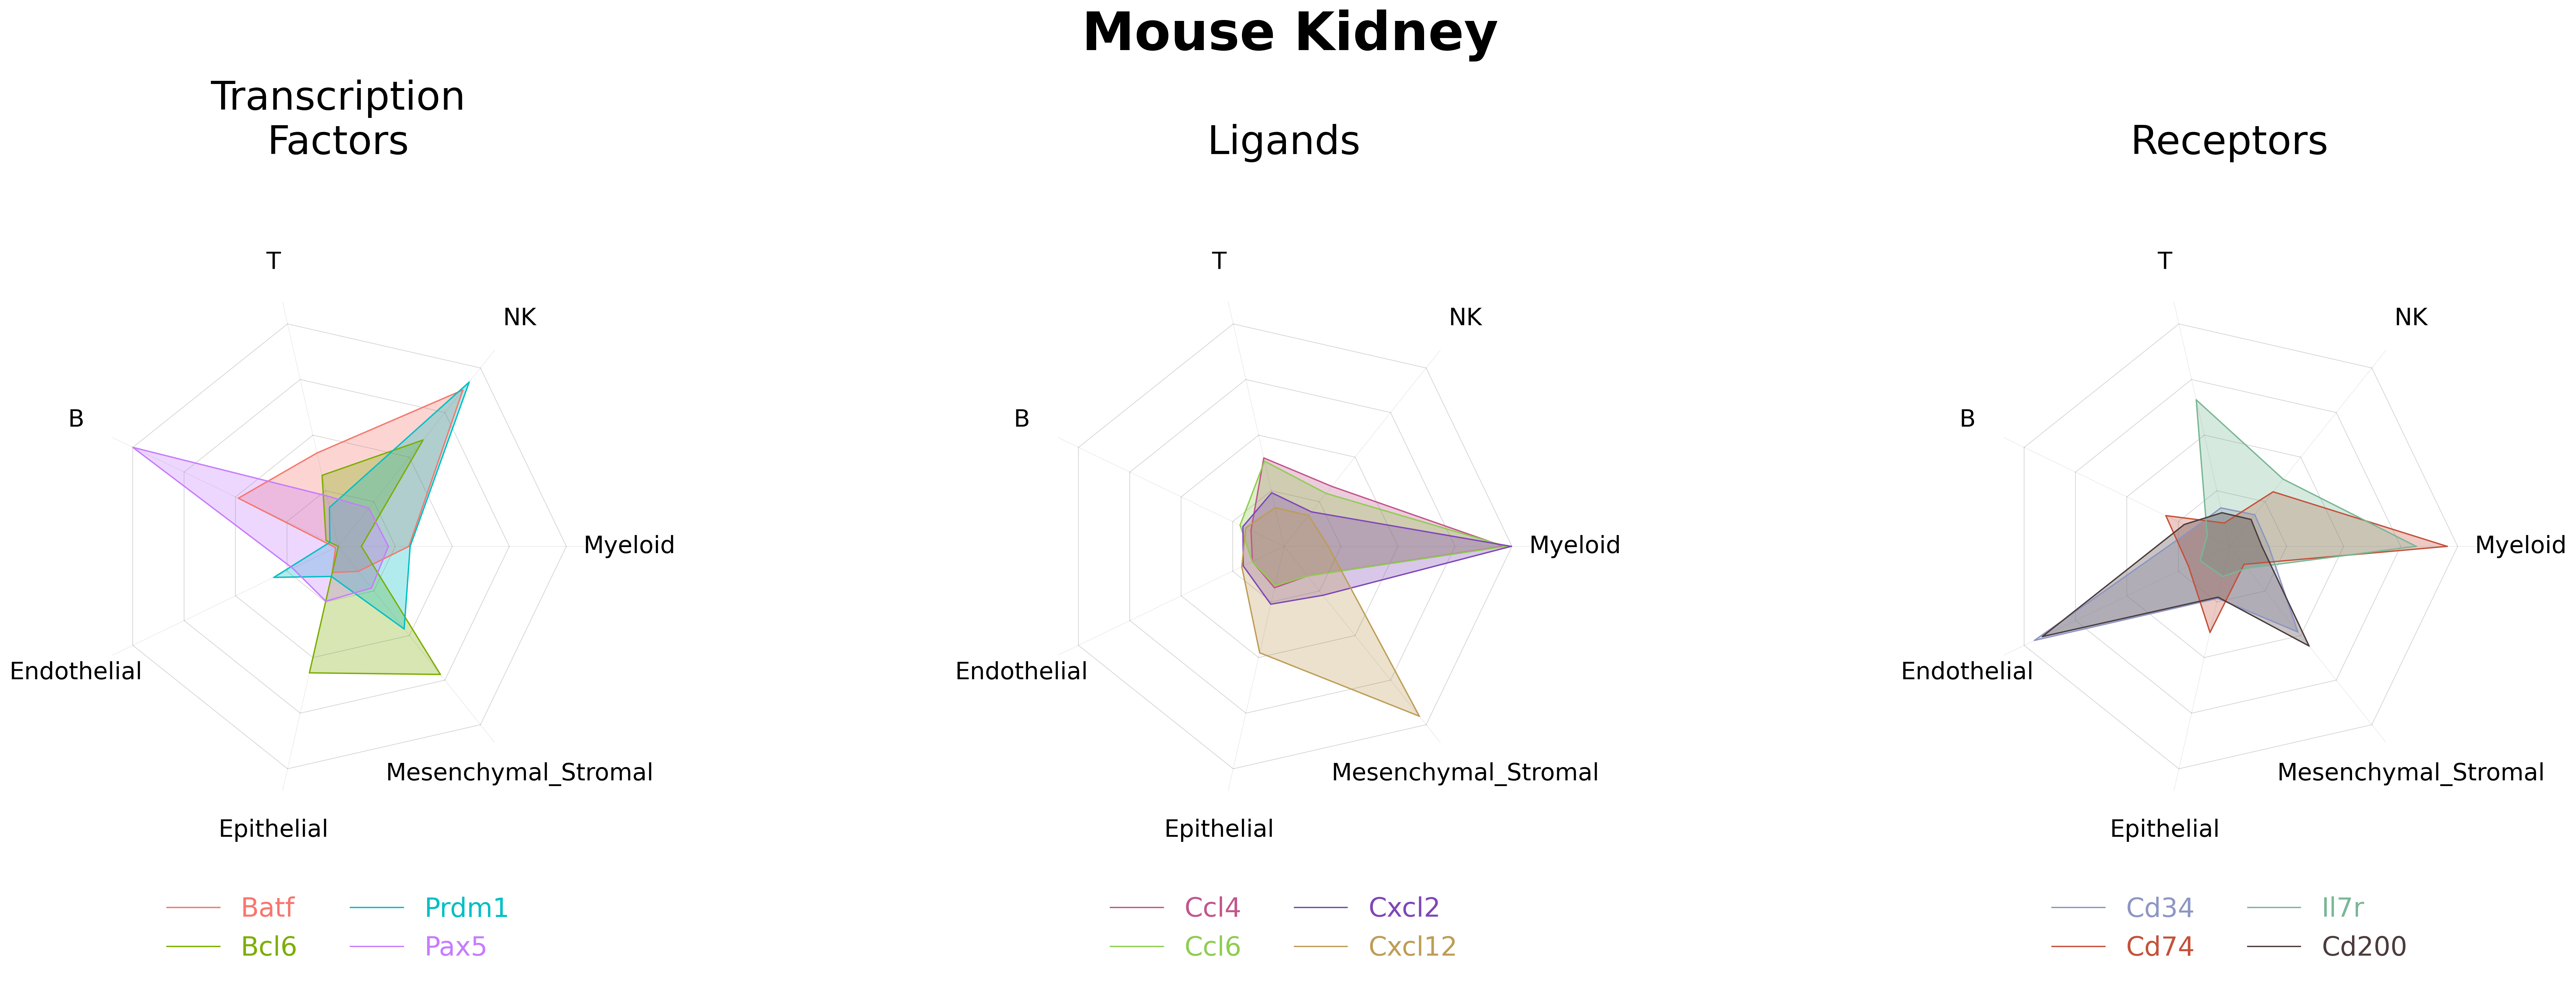

In [26]:
genes=[
        'Batf', 'Bcl6', 'Ccl3', 'Ccl4', 'Ccl6', 
        'Cd34', 'Cd74', 'Cxcl12', 'Cxcl2', 
        'Il7r', 'Pax5', 'Prdm1'
    ]

genesets = [
    ['Batf', 'Bcl6',  'Prdm1', 'Pax5'],
    ['Ccl4',  'Ccl6', 'Cxcl2', 'Cxcl12'],
    ['Cd34', 'Cd74', 'Il7r', 'Cd200'],
]

show_for = [
    'Myeloid', 
    'NK', 
    'T', 
    'B', 
    'Endothelial', 
    'Epithelial', 
    'Mesenchymal_Stromal'
]

fig, axs = plt.subplots(1, 3, figsize=(30, 8), dpi=300,
                subplot_kw={'projection': 'polar'})

kidney.plot_radar(impact_df=impact_df.join(extra),
    genes=genesets,
    show_for=show_for, 
    figsize=(30, 8),
    dpi=300,
    label_size=18,
    legend_size=20,
    axes=axs,
    colors=colors,
    fig=fig,
    
)

fontsize = 30
axs[0].set_title('Transcription\nFactors\n\n', fontsize=fontsize)
axs[1].set_title('Ligands\n\n', fontsize=fontsize)
axs[2].set_title('Receptors\n\n', fontsize=fontsize)

plt.suptitle('Mouse Kidney', fontsize=40, fontweight='bold', y=1.3)


# plt.savefig('./figures/spider_plots_B.svg', **figure_params)
plt.show()